In [1]:
# Data Ingestion

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import math

In [2]:
data = pd.read_csv("Belgium_Dataset.csv",encoding='latin-1')
data.head(10)  #first ten observations of the data set

,Ship-to ID,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,29000332,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.00,0.48,12.23,Brussels Capital Region,0.00
1,29000441,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.00,0.45,7.85,Liège,0.00
2,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.00,238.57,3577.69,Antwerp,14511.46
3,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.00,20.40,519.41,Antwerp,1605.19
4,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.00,12.00,288.63,Antwerp,718.32
5,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,RETURNABLE,104.10,0.00,0.00,0.30,1.55,Namur,0.00
6,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,176.50,0.00,0.00,0.60,15.27,Namur,0.00
7,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF BLONDE,PIEDBOEUF,PIEDBOEUF BLONDE,BOTTLE,RETURNABLE,2227.65,0.00,686.13,11.34,61.37,Namur,686.13
8,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,3412.19,0.00,1050.98,17.37,94.12,Namur,1050.98
9,29000721,0.42,0.505,Tier 2,Mainstream,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,RETURNABLE,20.82,6.15,0.00,0.06,0.31,Antwerp,6.15


In [3]:
data.drop(columns="Ship-to ID" , inplace = True, axis =1) #because ship-to id is unique to everyone and is insignificant to the result
data.head() 

,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00
2,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [4]:
print("Total Rows = " + str(data.shape[0]) + "\nTotal Columns = " + str(data.shape[1])) 

Total Rows = 39859
Total Columns = 18


Clearly, Dataset comprises of 39859 observations and 19 characteristics.


In [5]:
data.info() #columns and corresponding data types, finding whether they contain null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39859 entries, 0 to 39858
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Volume_2019_customer_level  39859 non-null  float64
 1   Volume_2018_customer_level  39859 non-null  float64
 2   sfdc_tier                   39859 non-null  object 
 3   poc_image                   39859 non-null  object 
 4   segment                     39859 non-null  object 
 5   sub_segment                 39859 non-null  object 
 6   Product_Set                 39859 non-null  object 
 7   Brand                       39859 non-null  object 
 8   Sub_Brand                   39859 non-null  object 
 9   Pack_Type                   39859 non-null  object 
 10  Returnalility               39859 non-null  object 
 11  GTO_2019                    39859 non-null  float64
 12  OnInvoice Discount(LCU)     39859 non-null  float64
 13  OffInvoice Discount(LCU)    398

No variable column has null/missing values.

In [6]:
data.describe()

,Volume_2019_customer_level,Volume_2018_customer_level,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,Discount_Total
count,39859.000000,39859.000000,3.985900e+04,39859.000000,3.985900e+04,39859.000000,39859.000000,3.985900e+04
mean,125.514751,124.553338,2.329499e+03,296.258596,3.227985e+02,8.466336,196.776225,6.190571e+02
std,417.311600,434.081066,2.183562e+04,2215.120009,1.005300e+04,88.055689,1523.500791,1.050909e+04
min,-6.000000,-21.100000,-1.625964e+04,-1721.640000,-2.097762e+04,-18.600000,-442.540000,-2.087009e+04
25%,23.635000,24.200000,7.712000e+01,0.000000,0.000000e+00,0.237000,4.505000,6.540000e+00
50%,60.583000,59.332000,2.234700e+02,18.000000,0.000000e+00,0.600000,14.100000,3.370000e+01
75%,117.508000,117.687000,7.992400e+02,87.080000,1.643000e+01,2.340000,60.845000,1.422400e+02
max,14773.000000,11636.000000,2.727988e+06,214981.440000,1.260856e+06,11662.500000,153880.570000,1.260856e+06


In [7]:
data.nunique()

Volume_2019_customer_level     4055
Volume_2018_customer_level     4082
sfdc_tier                         3
poc_image                         3
segment                           6
sub_segment                      16
Product_Set                     143
Brand                            24
Sub_Brand                        65
Pack_Type                         5
Returnalility                     2
GTO_2019                      10552
OnInvoice Discount(LCU)       14050
OffInvoice Discount(LCU)       9205
Volume_2019                    3032
Tax                            9277
province                         11
Discount_Total                17810
dtype: int64

In [8]:
#Data Wrangling

#We will examine each attribute and look for outliers and redundancies

data.sfdc_tier.unique()

array(['Tier 0', 'Tier 1', 'Tier 2'], dtype=object)

In [9]:
data.poc_image.unique()

array(['Mainstream', 'Premium', '0'], dtype=object)

In [10]:
(data.poc_image=='0').sum() 

80

In [11]:
#We need to drop the 0 values

data = data.loc[data["poc_image"] != '0']
data.shape

(39779, 18)

In [12]:
data.segment.unique()

array(['Entertainment Led', 'Not applicable', 'Drink Led',
       'Institutional', 'Food Led', 'Wholesaler'], dtype=object)

In [13]:
(data.segment=='Not applicable').sum() 

33

In [14]:
#We need to drop the Not Applicable values

data = data.loc[data["segment"] != 'Not applicable']
data.shape

(39746, 18)

In [15]:
data.sub_segment.unique()

array(['Events', 'Party Place', 'Institutional', 'Bar', 'Restaurant',
       'Sports Venue', 'Recreational', 'Beer bar', 'Hybrid',
       'Quick Dining', 'Music Venue', 'Cocktail Bar', 'Wholesaler',
       'Local Bar', 'Sub Agent'], dtype=object)

In [16]:
data.Product_Set.unique().shape

(143,)

In [17]:
data.Brand.unique()

array(['JUPILER', 'PIEDBOEUF', 'DIEKIRCH', 'BELLE VUE', 'HOEGAARDEN',
       'LEFFE', 'TRIPEL KARMELIET', 'GOOSE ISLAND', 'STELLA ARTOIS',
       'CORONA', 'VIEUX TEMPS', 'SCOTCH CTS', 'CUBANISTO', 'GINETTE',
       'KWAK', 'PURE BLONDE', 'BASS', 'KRUGER', "BECK'S", 'HORSE ALE',
       'GINDER-ALE', 'DEUS', 'SAFIR', 'BIRRA DEL BORGO'], dtype=object)

In [18]:
data.Sub_Brand.unique().shape

(65,)

In [19]:
data.Pack_Type.unique()

array(['BOTTLE', 'BULK', 'KEG', 'CAN', 'PERFECTDRAFT'], dtype=object)

<AxesSubplot:xlabel='Pack_Type', ylabel='count'>

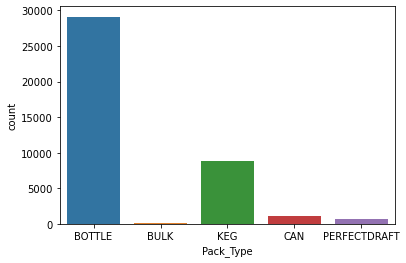

In [20]:
sns.countplot(x="Pack_Type", data= data)

In [21]:
data.Returnalility.unique()

array(['RETURNABLE', 'OW'], dtype=object)

<AxesSubplot:xlabel='Returnalility', ylabel='count'>

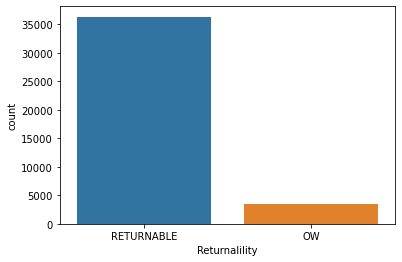

In [22]:
sns.countplot(x="Returnalility", data= data)

In [23]:
data.province.unique()

array(['Brussels Capital Region', 'Antwerp', 'Namur', 'Liège', 'Limburg',
       'Hainaut', 'East Flanders', 'Flemish Brabant', 'West Flanders',
       'Luxembourg', 'Walloon Brabant'], dtype=object)

Volume_2018_customer_level, Volume_2018_customer_level, OnInvoice Discount(LCU), OffInvoice Discount(LCU), Volume_2019,Tax and Discount_Total have continuous values.

In [24]:
# feature processing

poc_image = pd.get_dummies(data['poc_image'], drop_first = True)
# 0 corresponds to mainstream, 1 corresponds to premium

sfdc_tier = pd.get_dummies(data['sfdc_tier'], drop_first = True)
# 0 0 corresponds to tier 3

Returnalility= pd.get_dummies(data['Returnalility'], drop_first = True)
# 1 corresponds to returnable, 0 corresponds to OW

data= pd.concat([data, poc_image, sfdc_tier, Returnalility], axis = 1)
data.drop([ 'poc_image', 'Returnalility'], axis =1, inplace = True)
data.head()

,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,0.48,0.557,Tier 0,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00,0,0,0,1
2,270.97,225.720,Tier 1,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,0,1,0,0
3,270.97,225.720,Tier 1,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19,0,1,0,1
4,270.97,225.720,Tier 1,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32,0,1,0,1
5,29.61,25.860,Tier 2,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,104.10,0.00,0.0,0.30,1.55,Namur,0.00,0,0,1,1


We would like to add another column which determines the change in the consumption by the consumer.
Also, we will like to specially identify the new customers, i.e have "Volume_2018_customer_level = 0"


In [25]:
diff = (data.Volume_2019_customer_level - data.Volume_2018_customer_level)*1
data.insert(2, "Difference", diff, True)

new_customer = (data.Volume_2018_customer_level==0)*1
data.insert(2, "New_customer", new_customer, True)

data.drop(['Volume_2019_customer_level', 'Volume_2018_customer_level'], axis = 1, inplace = True)

data.head()

,New_customer,Difference,sfdc_tier,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,0,-0.077,Tier 0,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00,0,0,0,1
2,0,45.250,Tier 1,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,0,1,0,0
3,0,45.250,Tier 1,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19,0,1,0,1
4,0,45.250,Tier 1,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32,0,1,0,1
5,0,3.750,Tier 2,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,104.10,0.00,0.0,0.30,1.55,Namur,0.00,0,0,1,1


In [26]:
data.drop(['OnInvoice Discount(LCU)', 'OffInvoice Discount(LCU)'], axis = 1, inplace = True)

#Since we are only calculating only total_discount for now

In [27]:
data.head()

,New_customer,Difference,sfdc_tier,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,GTO_2019,Volume_2019,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,0,-0.077,Tier 0,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,141.20,0.48,12.23,Brussels Capital Region,0.00,0,0,0,1
2,0,45.250,Tier 1,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,61551.06,238.57,3577.69,Antwerp,14511.46,0,1,0,0
3,0,45.250,Tier 1,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,6001.00,20.40,519.41,Antwerp,1605.19,0,1,0,1
4,0,45.250,Tier 1,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,3051.36,12.00,288.63,Antwerp,718.32,0,1,0,1
5,0,3.750,Tier 2,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,104.10,0.30,1.55,Namur,0.00,0,0,1,1


<AxesSubplot:>

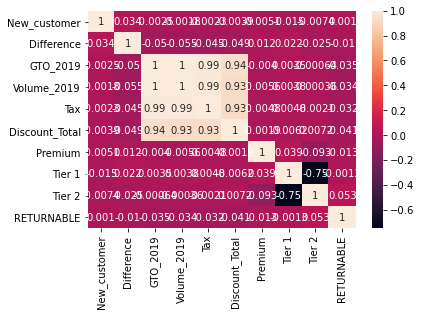

In [28]:
#We can analyse the relationship between the parameters through corelation

corelation = data.corr()
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels = corelation.columns, annot = True)

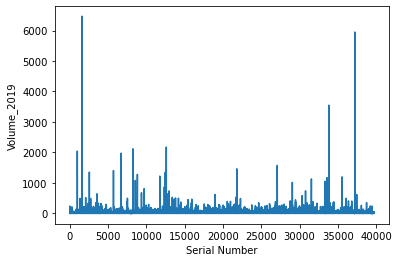

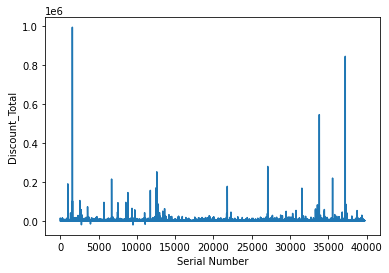

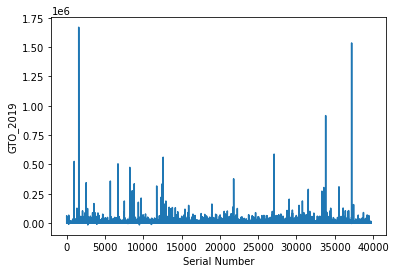

In [29]:
#observing the relationship between Volume_2019, Discount_Total and GTO_2019

n= data.shape[0] + 1

x = list(range(1, n))
y = data.Volume_2019
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Volume_2019')
plt.show()

x = list(range(1, n))
y = data.Discount_Total 
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Discount_Total')
plt.show()


x = list(range(1, n))
y = data.GTO_2019
plt.plot(x, y)
plt.xlabel('Serial Number')
plt.ylabel('GTO_2019')
plt.show()

We can clearly see that the shape of the graphs is very similar, which indicates that they have a linear relationship.

In [30]:
data = data.loc[data["Volume_2019"] != 0]

GTO_per_unit_vol = data.GTO_2019 / data.Volume_2019
data.insert(2, "GTO_per_unit_vol", GTO_per_unit_vol, True)
data.head()

data.drop(['Volume_2019', 'GTO_2019'], inplace= True, axis = 1)

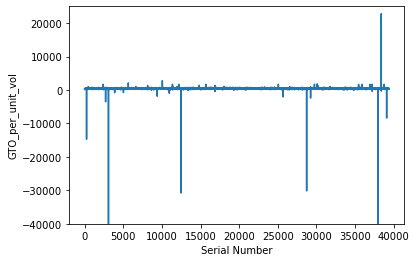

In [31]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([-40000, 25000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

We need to maximise the GTO/Volume, so we can omit the negative values.

In [32]:
data = data.loc[data["GTO_per_unit_vol"] > 0]
data.shape

(39328, 17)

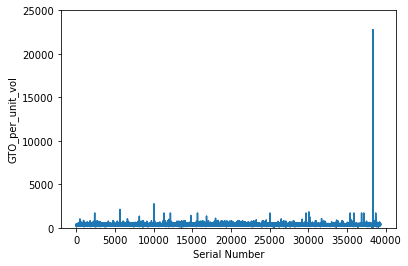

In [33]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([0, 25000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

Clearly, there are some outliers which we have to figure out.

In [34]:
(data.GTO_per_unit_vol>=5000).sum()

1

In [35]:
data = data.loc[data["GTO_per_unit_vol"] < 5000]

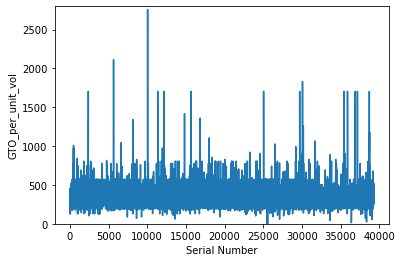

In [36]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([0, 2800])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

In [37]:
data_high = data.loc[data["GTO_per_unit_vol"] > 500]
data_high.shape

(982, 17)

Lets observe the high GTO/Vol values

In [38]:
data_high.head(10)

,New_customer,Difference,GTO_per_unit_vol,sfdc_tier,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
179,0,-21.729,520.444444,Tier 1,Institutional,Institutional,RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK,BELLE VUE,BELLE VUE EXTRA KRIEK,BOTTLE,10.70,Flemish Brabant,-0.30,0,1,0,1
329,0,-5.136,554.705882,Tier 2,Drink Led,Beer bar,OW_BOTTLE_CORONA_CORONA EXTRA,CORONA,CORONA EXTRA,BOTTLE,2.89,Luxembourg,0.00,0,0,1,0
356,0,-47.176,573.333333,Tier 2,Drink Led,Bar,RETURNABLE_BOTTLE_BASS_BASS PALE ALE,BASS,BASS PALE ALE,BOTTLE,1.52,West Flanders,0.59,0,0,1,1
385,0,-1.527,573.333333,Tier 1,Drink Led,Bar,RETURNABLE_BOTTLE_BASS_BASS PALE ALE,BASS,BASS PALE ALE,BOTTLE,6.10,East Flanders,41.42,0,1,0,1
408,0,-2.514,573.333333,Tier 1,Drink Led,Bar,RETURNABLE_BOTTLE_BASS_BASS PALE ALE,BASS,BASS PALE ALE,BOTTLE,13.72,East Flanders,0.00,0,1,0,1
414,0,-6.733,573.333333,Tier 1,Food Led,Hybrid,RETURNABLE_BOTTLE_BASS_BASS PALE ALE,BASS,BASS PALE ALE,BOTTLE,1.52,East Flanders,8.22,0,1,0,1
458,0,0.215,503.924051,Tier 1,Drink Led,Bar,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN GRAND CRU,HOEGAARDEN,HOEGAARDEN GRAND CRU,BOTTLE,2.97,Flemish Brabant,0.00,0,1,0,1
481,0,-11.204,776.823105,Tier 0,Food Led,Hybrid,RETURNABLE_BOTTLE_LEFFE_FLAVOURED ALCOHOLIC,LEFFE,FLAVOURED ALCOHOLIC,BOTTLE,37.12,Brussels Capital Region,149.42,0,0,0,1
504,0,-15.394,604.444444,Tier 2,Food Led,Hybrid,RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK,BELLE VUE,BELLE VUE EXTRA KRIEK,BOTTLE,6.08,Namur,15.41,0,0,1,1
508,0,-15.394,524.500000,Tier 2,Food Led,Hybrid,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,BOTTLE,3.84,Namur,11.82,0,0,1,1


<AxesSubplot:xlabel='Pack_Type', ylabel='count'>

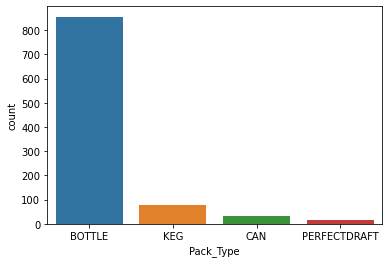

In [39]:
sns.countplot(x="Pack_Type", data= data_high)

<AxesSubplot:xlabel='sfdc_tier', ylabel='count'>

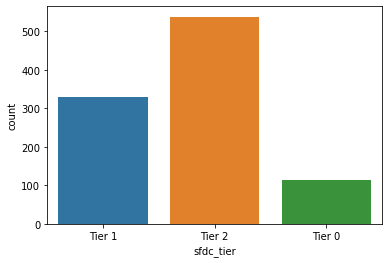

In [40]:
sns.countplot(x = "sfdc_tier", data= data_high)

<AxesSubplot:xlabel='province', ylabel='count'>

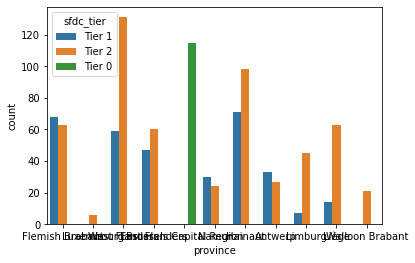

In [41]:
sns.countplot(x = "province", hue = 'sfdc_tier', data= data_high)

<AxesSubplot:xlabel='Brand', ylabel='count'>

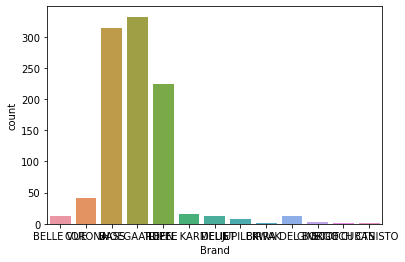

In [42]:
sns.countplot(x = "Brand", data= data_high)

<AxesSubplot:xlabel='segment', ylabel='count'>

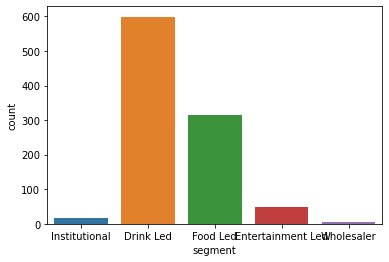

In [43]:
sns.countplot(x = "segment", data= data_high)

<AxesSubplot:xlabel='RETURNABLE', ylabel='count'>

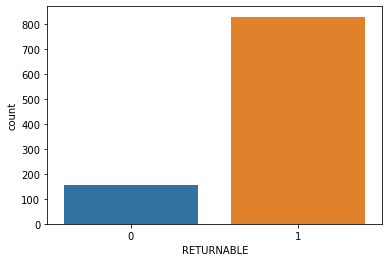

In [44]:
sns.countplot(x = "RETURNABLE", data= data_high)

Clearly there are specific attribute distribution.

In [45]:
data.drop('sfdc_tier', axis = 1, inplace = True)
data.head()

,New_customer,Difference,GTO_per_unit_vol,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,0,-0.077,294.166667,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,12.23,Brussels Capital Region,0.00,0,0,0,1
2,0,45.250,258.000000,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,3577.69,Antwerp,14511.46,0,1,0,0
3,0,45.250,294.166667,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,519.41,Antwerp,1605.19,0,1,0,1
4,0,45.250,254.280000,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,288.63,Antwerp,718.32,0,1,0,1
5,0,3.750,347.000000,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,1.55,Namur,0.00,0,0,1,1


We will be making a different set of data for people visiting for the first time.

In [46]:
data_new_customers= data.loc[data["New_customer"]==1]
data_new_customers.drop(['New_customer','Difference'], axis=1, inplace = True)
data_new_customers.shape

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(166, 14)

In [47]:
data_new_customers.head()

,GTO_per_unit_vol,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
29,338.927445,Entertainment Led,Events,OW_CAN_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,CAN,10.74,Hainaut,0.0,0,1,0,0
81,258.933333,Institutional,Institutional,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,43.29,East Flanders,0.0,0,0,1,1
204,349.750000,Drink Led,Bar,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,BOTTLE,2.58,Flemish Brabant,0.0,0,1,0,1
205,379.936709,Drink Led,Bar,RETURNABLE_BOTTLE_LEFFE_LEFFE SANS ALCOOL/ALCO...,LEFFE,LEFFE SANS ALCOOL/ALCOHOLVRIJ,BOTTLE,0.81,Flemish Brabant,0.0,0,1,0,1
206,261.340000,Drink Led,Bar,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...,STELLA ARTOIS,STELLA ARTOIS REGULAR,KEG,60.14,Flemish Brabant,0.0,0,1,0,1


In [48]:
data_not_new = data.loc[data["New_customer"]==0]
data_not_new.drop('New_customer', axis = 1, inplace = True)

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now, we can also make a dataset of customers who ordered less product than 2018

In [49]:
data_diff_neg = data_not_new.loc[data["Difference"]<0]
data_diff_neg.drop('Difference', axis = 1, inplace =True)
data_diff_neg.shape

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(19574, 14)

In [50]:
data_diff_neg.head()

,GTO_per_unit_vol,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,294.166667,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,12.23,Brussels Capital Region,0.00,0,0,0,1
9,347.000000,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,0.31,Antwerp,6.15,0,0,1,1
10,294.166667,Institutional,Institutional,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,9.16,Antwerp,29.02,0,0,1,1
56,453.333333,Drink Led,Bar,RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK,BELLE VUE,BELLE VUE EXTRA KRIEK,BOTTLE,77.71,East Flanders,418.82,0,0,1,1
57,302.833333,Drink Led,Bar,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN WHITE,HOEGAARDEN,HOEGAARDEN WHITE,BOTTLE,27.50,East Flanders,95.84,0,0,1,1


Similarly, we can make a set of customers ordered equal or more than 2018

In [51]:
data_diff_noneg = data_not_new.loc[data["Difference"]>=0]
data_diff_noneg.drop('Difference', axis = 1, inplace =True)
data_diff_noneg.shape

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(19587, 14)

In [52]:
data_diff_noneg.head()

,GTO_per_unit_vol,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Tax,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
2,258.000000,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,3577.69,Antwerp,14511.46,0,1,0,0
3,294.166667,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,519.41,Antwerp,1605.19,0,1,0,1
4,254.280000,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,288.63,Antwerp,718.32,0,1,0,1
5,347.000000,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,1.55,Namur,0.00,0,0,1,1
6,294.166667,Institutional,Institutional,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,15.27,Namur,0.00,0,0,1,1
